
モデルの精度: 0.8877551020408163

分類レポート:
               precision    recall  f1-score   support

          No       0.89      1.00      0.94       256
         Yes       0.86      0.16      0.27        38

    accuracy                           0.89       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.88      0.89      0.85       294



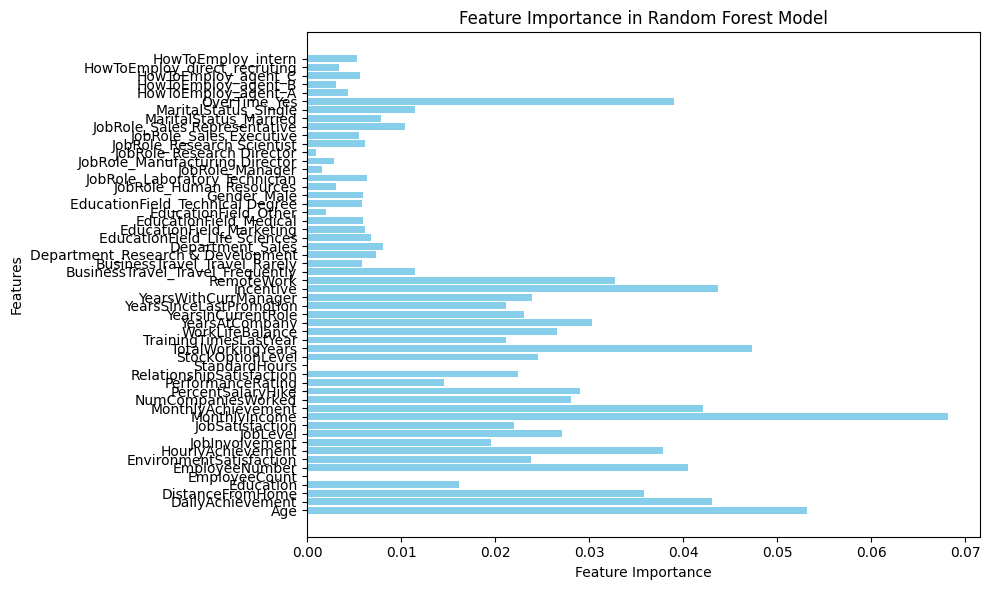

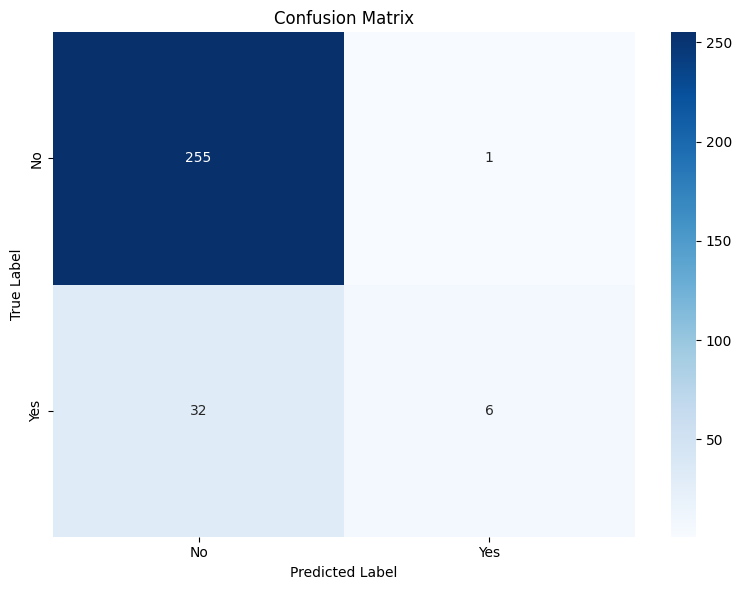

InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 1.0 instead.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = "data.csv"
data = pd.read_csv(csv_file)

target_column = "Attrition"
if target_column not in data.columns:
    raise ValueError(f"指定されたターゲット列 '{target_column}' がデータに存在しません。利用可能な列: {data.columns}")

X = data.drop(columns=[target_column])
y = data[target_column]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nモデルの精度:", accuracy)
print("\n分類レポート:\n", classification_report(y_test, y_pred))

feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
train_accuracies = []
test_accuracies = []

for train_size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    model.fit(X_train_part, y_train_part)
    train_accuracies.append(model.score(X_train_part, y_train_part))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(train_sizes, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Training vs. Test Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("training_vs_test_accuracy.png")
plt.show()
